In [1]:
import gym
import minihack
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display

In [2]:
!python -m minihack.scripts.env_list

MiniHack-Room-5x5-v0
MiniHack-Room-Random-5x5-v0
MiniHack-Room-Dark-5x5-v0
MiniHack-Room-Monster-5x5-v0
MiniHack-Room-Trap-5x5-v0
MiniHack-Room-Ultimate-5x5-v0
MiniHack-Room-15x15-v0
MiniHack-Room-Random-15x15-v0
MiniHack-Room-Dark-15x15-v0
MiniHack-Room-Monster-15x15-v0
MiniHack-Room-Trap-15x15-v0
MiniHack-Room-Ultimate-15x15-v0
MiniHack-Corridor-R2-v0
MiniHack-Corridor-R3-v0
MiniHack-Corridor-R5-v0
MiniHack-KeyRoom-Fixed-S5-v0
MiniHack-KeyRoom-S5-v0
MiniHack-KeyRoom-S15-v0
MiniHack-KeyRoom-Dark-S5-v0
MiniHack-KeyRoom-Dark-S15-v0
MiniHack-MazeWalk-9x9-v0
MiniHack-MazeWalk-Mapped-9x9-v0
MiniHack-MazeWalk-15x15-v0
MiniHack-MazeWalk-Mapped-15x15-v0
MiniHack-MazeWalk-45x19-v0
MiniHack-MazeWalk-Mapped-45x19-v0
MiniHack-CorridorBattle-v0
MiniHack-CorridorBattle-Dark-v0
MiniHack-MultiRoom-N2-v0
MiniHack-MultiRoom-N4-v0
MiniHack-MultiRoom-N6-v0
MiniHack-MultiRoom-N10-v0
MiniHack-MultiRoom-N6-OpenDoor-v0
MiniHack-MultiRoom-N10-OpenDoor-v0
MiniHack-MultiRoom-N2-Locked-v0
MiniHack-MultiRoom-N4-L

In [3]:
# create the environment
env = gym.make("MiniHack-MazeWalk-45x19-v0", observation_keys=("chars", "pixel"))
# reset it to initial state
state = env.reset()
# render the environment
env.render()


Be careful!  New moon tonight.                                                  
                                                                                
                                                                                
                                                                                
                    ......@.......>                                             
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                           

In [4]:
env.actions

(<CompassDirection.N: 107>,
 <CompassDirection.E: 108>,
 <CompassDirection.S: 106>,
 <CompassDirection.W: 104>,
 <CompassDirection.NE: 117>,
 <CompassDirection.SE: 110>,
 <CompassDirection.SW: 98>,
 <CompassDirection.NW: 121>)

In [6]:
state

{'chars': array([[32, 32, 32, ..., 32, 32, 32],
        [32, 32, 32, ..., 32, 32, 32],
        [32, 32, 32, ..., 32, 32, 32],
        ...,
        [32, 32, 32, ..., 32, 32, 32],
        [32, 32, 32, ..., 32, 32, 32],
        [32, 32, 32, ..., 32, 32, 32]], dtype=uint8),
 'pixel': array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],


In [7]:
state['chars'].shape, state['pixel'].shape

((21, 79), (336, 1264, 3))

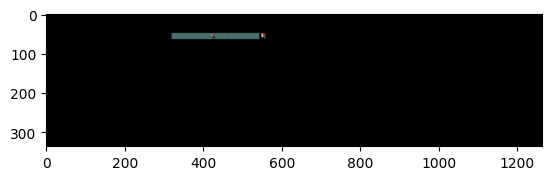

In [8]:
plt.imshow(state['pixel'])

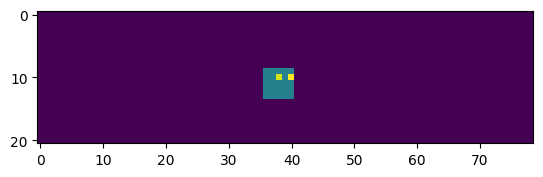

In [13]:
# add by me
plt.imshow(state['chars'])

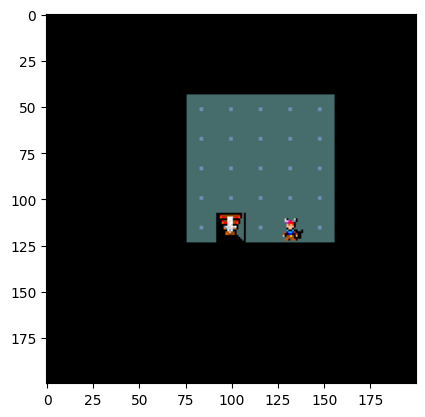

In [42]:
plt.imshow(state['pixel'][100:300, 500:700])

In [19]:
from utils import *
from algorithms import bfs, a_star

In [43]:
game_map = state['chars']
game = state['pixel']

In [22]:
game_map

array([[32, 32, 32, ..., 32, 32, 32],
       [32, 32, 32, ..., 32, 32, 32],
       [32, 32, 32, ..., 32, 32, 32],
       ...,
       [32, 32, 32, ..., 32, 32, 32],
       [32, 32, 32, ..., 32, 32, 32],
       [32, 32, 32, ..., 32, 32, 32]], dtype=uint8)

In [44]:
start = get_player_location(game_map)
target = get_target_location(game_map)
print("Agent position:", start)
print("Target position:", target)
# la prima coordinata è la y (dall'alto verso il basso) e parte da 1
# la seconda coordinata è la x (da sinistra verso destra) e parte da 1
# Agent position: (5, 1) 
# Target position: (4, 14)

Agent position: (13, 39)
Target position: (13, 37)


In [45]:
%%time
path = bfs(game_map, start, target)

Target found!
CPU times: user 316 µs, sys: 66 µs, total: 382 µs
Wall time: 354 µs


In [25]:
path

[(10, 40), (10, 39), (10, 38)]

In [26]:
actions = actions_from_path(start, path[1:])

In [27]:
actions

[3, 3]

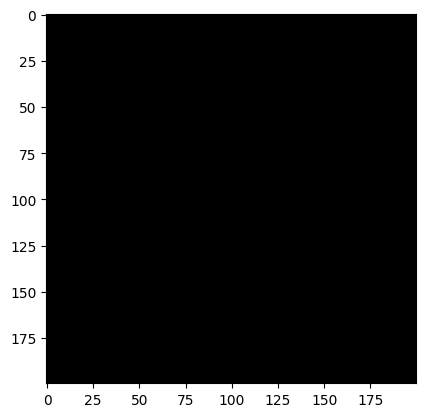

In [46]:
# env.step(action) fa muovere il personaggio.
# come parametro action è o un intero (0 -> up; 1 -> dx; 2 -> down; 3 -> sx) oppure una lista di interi
image = plt.imshow(game[100:300, 500:700])
for action in actions:
    s, _, _, _ = env.step(action)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(s['pixel'][100:300, 500:700])